In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
ds = pd.read_csv('/content/global_co2.csv')
ds

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [12]:
df=ds.dropna()

In [13]:
df

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
199,1950,1630,97,423,1070,18,23,0.64
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.68
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [14]:
x = df.iloc[: , :1].values  #rows, columns
y = df.iloc[: , -1:].values

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.30, random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# **LINEAR REGRESSION**

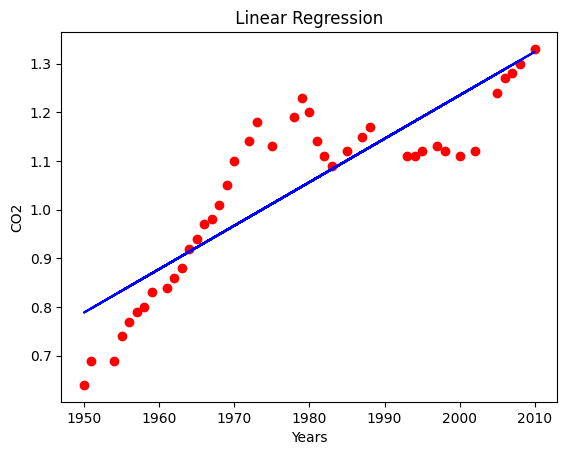

Accuracy:  62.82530704752946


In [30]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' Linear Regression ')
plt.xlabel('Years')
plt.ylabel('CO2')
plt.show()

print("Accuracy: ",regressor.score(x_test,y_test)* 100)

# **POLINOMIAL REGRESSION**

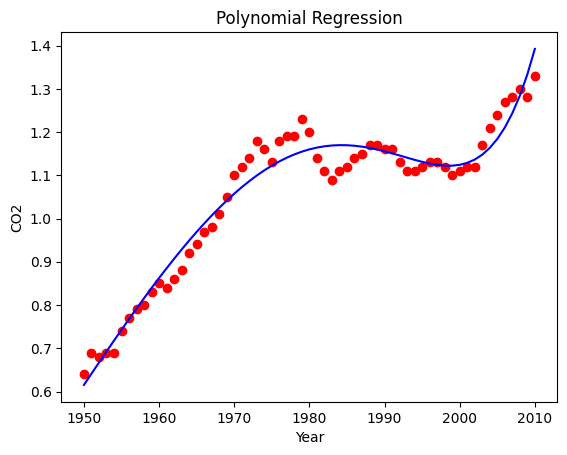

Accuracy:  95.79396178979384


In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =90)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)),color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.show()

X_test_poly = poly_reg.transform(x_test)  # Make sure you did this step
print("Accuracy: ", lin_reg_2.score(X_test_poly, y_test) * 100)

# **RANDOM FOREST REGRESSION**

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 62, random_state = 1)
regressor.fit(x, y)

<ipython-input-58-c54c98201b7a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


RandomForestRegressor(n_estimators=62, random_state=1)

<ipython-input-59-b85809990a67>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.01)


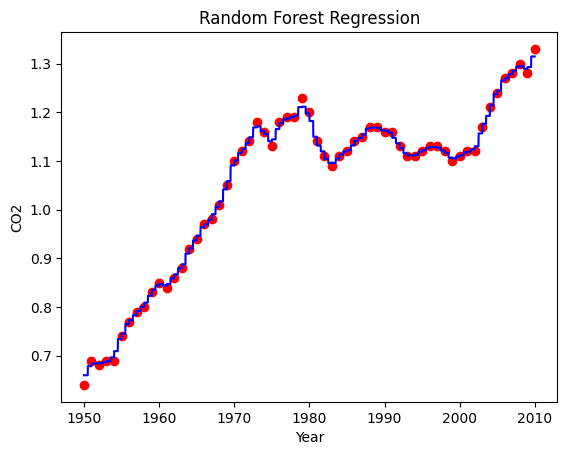

Accuracy:  99.77520461777793


In [59]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.show()

print("Accuracy: ",regressor.score(x_test,y_test)* 100)

In [62]:
def predict_for_year(year):
    return regressor.predict([[year]])

year_to_predict = 2008
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")

year_to_predict = 2009
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")

year_to_predict = 2010
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")

Predicted value for the year 2008: 1.2935483870967734
Predicted value for the year 2009: 1.2893548387096776
Predicted value for the year 2010: 1.3145161290322573


# **DECISION TREE REGRESSION**

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

<ipython-input-52-4a832a548893>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x_train), max(x_train), 0.01)


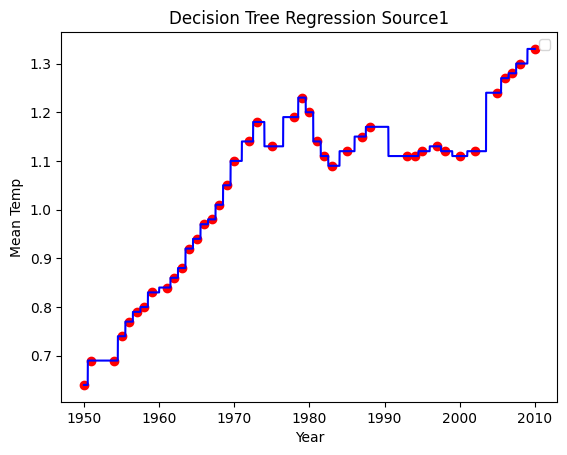

Accuracy:  97.54959912301443


In [52]:
X_grid = np.arange(min(x_train), max(x_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train, y_train, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Decision Tree Regression Source1')
plt.legend()
plt.show()


print("Accuracy: ",regressor.score(x_test,y_test)* 100)

# **CONCLUSION**

Random Forest Regressor gives 99% accurate results in this case.